In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the dataset from the .pt file
data = torch.load("data/schroeder_softlabels_new.pt")

# Extract images, labels, and soft labels
x = data["images"]  # Tensor of images
softlabels = data["softlabels"]  # Tensor of keypoints

# Set the number of images to display
num_images = len(x)

# Loop over the images in the dataset
for i in range(num_images):
    # Get the image and soft label
    image = x[i].permute(1, 2, 0).numpy()  # Convert from [C, H, W] to [H, W, C]
    image = np.clip(image, 0, 1)  # Ensure values are within [0, 1]
    
    soft_label = softlabels[i, 0].numpy()  # Convert soft label to numpy array
    
    # Create the plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the image
    ax[0].imshow(image)
    ax[0].set_title(f"Image {i+1}")
    ax[0].axis('off')
    
    # Plot the soft label as a heatmap
    im = ax[1].imshow(soft_label, cmap=cm.jet, alpha=0.6)
    ax[1].set_title(f"Soft Label {i+1}")
    ax[1].axis('off')
    
    # Add a colorbar for the soft label
    fig.colorbar(im, ax=ax[1], orientation='vertical')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


AttributeError: 'numpy.float64' object has no attribute 'numpy'

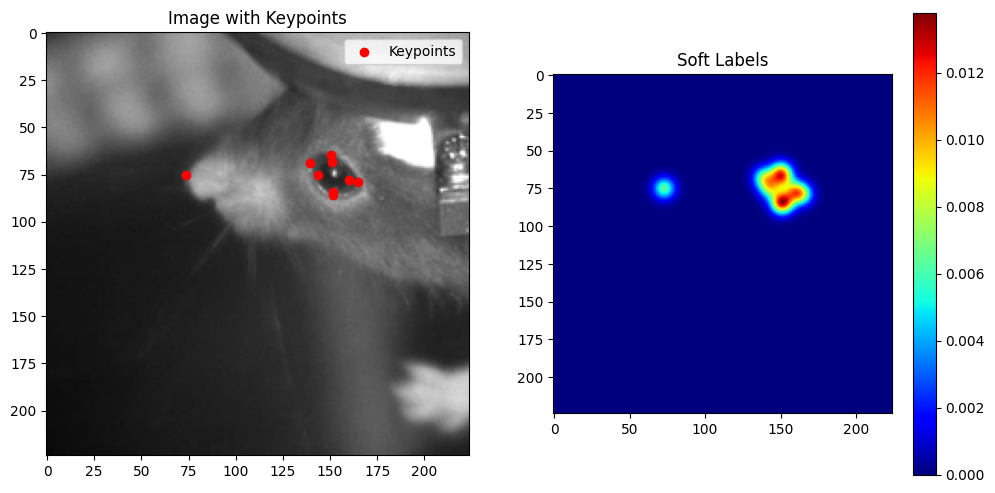

In [7]:
# KEEP FOR NOW
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.ndimage import gaussian_filter

# Load the data from the .pt file
data = torch.load("data/processed_images_labels/schroeder_test.pt")
x = data['images']  # Tensor of images
y = data['labels']  # Tensor of keypoints (shape: N x 2*K)
filenames = data['filenames']  # List of filenames

# Select the first image and its keypoints for visualization
img = x[0].permute(1, 2, 0).numpy()  # Convert image tensor to numpy (H, W, C)
keypoints = y[0].numpy()  # Assuming keypoints are stored as a 1D array of x, y values

# Plot the image with keypoints
plt.figure(figsize=(12, 6))

# Left: Image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image with Keypoints")
plt.scatter(keypoints[::2], keypoints[1::2], c='r', label='Keypoints')  # Keypoints are in (x, y) pairs
plt.legend()

# Right: Soft labels (we will use the same method as before to generate soft labels)
h, w = img.shape[0], img.shape[1]  # Height and Width of the image
mask = np.zeros((h, w))

# Remove NaN values from keypoints and create a mask
keypoints_filtered = keypoints[~np.isnan(keypoints)]
idx_x, idx_y = keypoints_filtered[1::2].astype(int), keypoints_filtered[::2].astype(int)
mask[idx_x, idx_y] = 1

# Apply Gaussian filter to generate soft labels
sigma = 5  # Increase from original 3 to 5 for smoother heatmap
soft_label = gaussian_filter(mask, sigma=sigma)

# Right: Soft label heatmap
plt.subplot(1, 2, 2)
plt.imshow(soft_label, cmap='jet')
plt.title("Soft Labels")
plt.colorbar()

plt.show()

torch.save({
    'images': x,
    'labels': y,
    'softlabels': softlabels,
    'filenames': filenames
}, "data/schroeder_softlabels_new.pt")


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.ndimage import gaussian_filter

# Load the soft labels dataset
data = torch.load("data/schroeder_softlabels_new.pt")
x = data['images']  # Tensor of images
soft_labels = data['softlabels']  # Soft labels (heatmaps)

# Select the first image and its soft label for visualization
img = x[0].permute(1, 2, 0).numpy()  # Convert image tensor to numpy (H, W, C)
soft_label = soft_labels[0]  # Get the soft label for the first image

# Check the shape of the soft label
if soft_label.ndim == 1:
    # If soft_label is 1D, reshape it to (height, width) based on the image size
    h, w = img.shape[0], img.shape[1]
    soft_label = soft_label.reshape(h, w)

# Plot the image with soft label
plt.figure(figsize=(12, 6))

# Left: Image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image")
plt.axis('off')

# Right: Soft label (heatmap)
plt.subplot(1, 2, 2)
plt.imshow(soft_label, cmap='hot', interpolation='nearest')
plt.title("Soft Label (Heatmap)")
plt.axis('off')

# Show the plots
plt.show()


ValueError: cannot reshape array of size 224 into shape (224,224)